Question 7:
How hac public opinions about the ‘tradwife’ movement evolved since its beginning in 2020?

In [1]:
import sys
!{sys.executable} -m pip install pandas

In [ ]:
import pandas as pd
import json

data = pd.read_csv('seven.csv')

# The next line cleans the data by removing duplicate lines.
data.drop_duplicates(inplace = True)

data['Published At'] = pd.to_datetime(data['Published At'])

# These are the time periods for the comparison of the number of videos, views and likes in a specific time period.
time_periods = [
    ('2020', '2020-01-01', '2020-12-31'),
    ('2021', '2021-01-01', '2021-12-31'),
    ('2022', '2022-01-01', '2022-12-31'),
    ('2023', '2023-01-01', '2023-12-31'),
    ('2024_first_third', '2024-01-01', '2024-04-30'),
    ('2024_second_third', '2024-05-01', '2024-08-31'),
    ('2024_third_third', '2024-09-01', '2024-12-31'),
    ('2025_first_third', '2025-01-01', '2025-04-30'),
    ('2025_second_third', '2025-05-01', '2025-08-31'),
]

results = {}  # The results should be saved in this dictionary which will later be saved in a json-file.

for name, start, end in time_periods:

    filter = (data['Published At'] >= start) & (data['Published At'] <= end)
    filtered = data[filter]  # All videos are filter by the time periods defined above.

    results[name] = {
        'videos': int(len(filtered)),  # The number of videos ...
        'views' : int(filtered['Views'].sum()),  # as well as the sum of views ...
        'likes' : int(filtered['Likes'].sum()),  # and the sum of likes are stored in the result-dictionary.
    }

# The results are saved in a json-file for further processing.
with open('answer_seven.json', 'w', encoding='utf-8') as file:
    json.dump(results, file, indent=5)


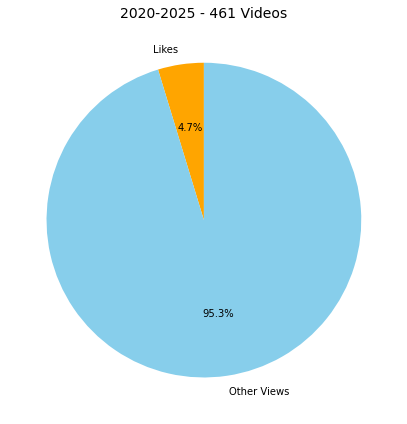

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

with open('answer_seven.json', 'r', encoding='utf-8') as file:
    statistics = json.load(file)

data = pd.DataFrame.from_dict(statistics, orient='index')  # data is a pandas dataframe object including the results from the json-file.

all_views = data['views'].sum()
all_likes = data['likes'].sum()
all_other_views = max(0,all_views - all_likes)  # This is the number of views without a like.

plt.figure(figsize=(6,6))
plt.pie(
    [all_likes, all_other_views],  # The pie chart visualizes the ratio of likes per views for all time periods comnbined.
    labels=['Likes', 'Other Views'],
    colors=['orange', 'skyblue'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title(f'2020-2025 - {data["videos"].sum()} Videos', fontsize=14)
plt.tight_layout()
plt.show()

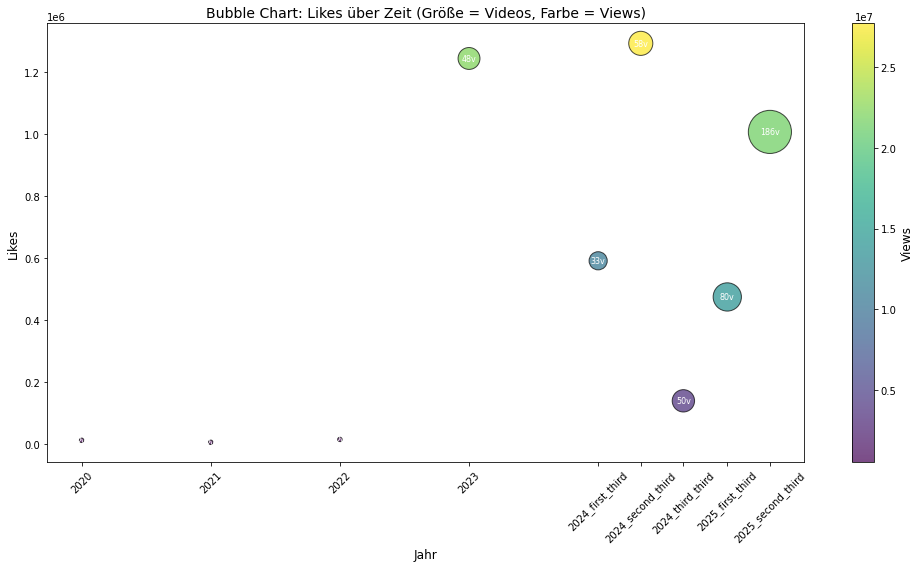

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "2020": {"videos": 2, "views": 725796, "likes": 12657},
    "2021": {"videos": 2, "views": 609189, "likes": 6190},
    "2022": {"videos": 2, "views": 514651, "likes": 15390},
    "2023": {"videos": 48, "views": 22202690, "likes": 1244655},
    "2024_first_third": {"videos": 33, "views": 10751468, "likes": 591883},
    "2024_second_third": {"videos": 58, "views": 27729825, "likes": 1293452},
    "2024_third_third": {"videos": 50, "views": 3632941, "likes": 140073},
    "2025_first_third": {"videos": 80, "views": 13996635, "likes": 475216},
    "2025_second_third": {"videos": 186, "views": 21510502, "likes": 1007704}
}

time_mapping = {  # The x-axis shows the time period. 
    "2020": 2020.0,
    "2021": 2021.0,
    "2022": 2022.0,
    "2023": 2023.0,
    "2024_first_third": 2024.0,
    "2024_second_third": 2024.33,
    "2024_third_third": 2024.66,
    "2025_first_third": 2025.0,
    "2025_second_third": 2025.33
}

df = pd.DataFrame(data).T
df["time"] = df.index.map(time_mapping)

plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    df["time"],
    df["likes"],
    s=df["videos"] * 10,  # The bubble size is relative to the number of videos in this time period. 
    c=df["views"],
    cmap="viridis",
    alpha=0.7,
    edgecolors="k"
)

plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Likes", fontsize=12)
plt.title("Bubble Chart: Likes über Zeit (Größe = Videos, Farbe = Views)", fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label("Views", fontsize=12)

plt.xticks(sorted(df["time"]), df.index, rotation=45)

for i, row in df.iterrows():
    plt.text(row["time"], row["likes"], f'{int(row["videos"])}v', ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()
plt.show()